Task 5: Binary Classification with Logistic Regression 
● Load the Breast Cancer Dataset from sklearn.datasets. 
● Train a logistic regression model to predict whether a tumor is 
benign or malignant. 
● Evaluate using: 
○ Accuracy 
○ Confusion Matrix 
○ Precision, Recall, F1-score 
○ ROC-AUC curve

Acc: 0.9561

Confusion Matrix:
 [[39  4]
 [ 1 70]]

Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC: 0.9977


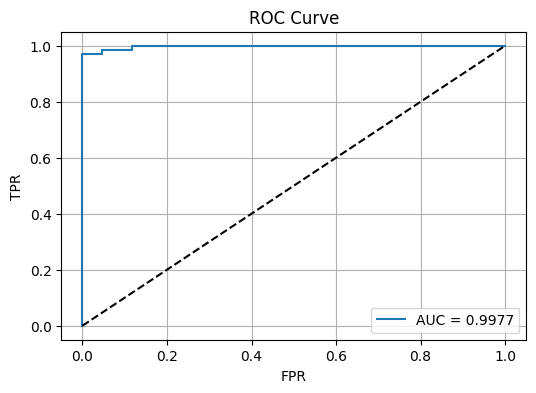

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

d = load_breast_cancer()
X, y = d.data, d.target

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)

m = LogisticRegression(max_iter=10000)
m.fit(Xtr, ytr)
yp = m.predict(Xts)
yp_prob = m.predict_proba(Xts)[:, 1]

a = accuracy_score(yts, yp)
c = confusion_matrix(yts, yp)
r = classification_report(yts, yp)
auc = roc_auc_score(yts, yp_prob)
fpr, tpr, _ = roc_curve(yts, yp_prob)

print(f"Acc: {a:.4f}\n")
print("Confusion Matrix:\n", c)
print("\nReport:\n", r)
print(f"ROC-AUC: {auc:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Task 6: Threshold Tuning and Probability Interpretation 
● Predict the probability of the positive class. 
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the 
confusion matrix and F1-score change. 
● Plot the ROC curve and mark optimal threshold.

Thresh  ConfMat        F1
0.3     [[39, 4], [1, 70]]   0.9655
0.5     [[39, 4], [1, 70]]   0.9655
0.7     [[41, 2], [1, 70]]   0.9790


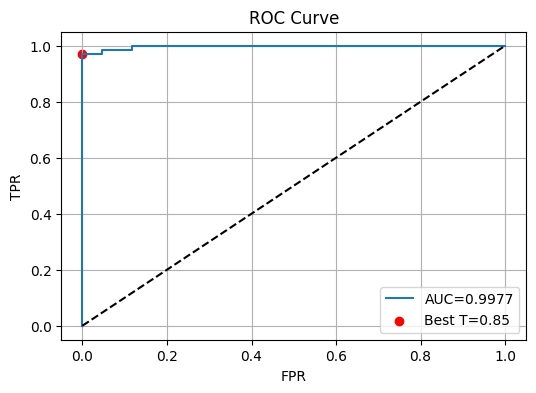

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score

d = load_breast_cancer()
X, y = d.data, d.target

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)

m = LogisticRegression(max_iter=10000)
m.fit(Xtr, ytr)
p = m.predict_proba(Xts)[:, 1]

thr = [0.3, 0.5, 0.7]

print("Thresh  ConfMat        F1")
for t in thr:
    yp = (p >= t).astype(int)
    cm = confusion_matrix(yts, yp)
    f1 = f1_score(yts, yp)
    print(f"{t:.1f}     {cm.tolist()}   {f1:.4f}")

fpr, tpr, th = roc_curve(yts, p)
auc = roc_auc_score(yts, p)

f1s = [f1_score(yts, (p >= x).astype(int)) for x in th]
best_idx = np.argmax(f1s)
best_t = th[best_idx]

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC={auc:.4f}")
plt.scatter(fpr[best_idx], tpr[best_idx], color='red', label=f"Best T={best_t:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


Task 7: Multiclass Classification (Optional) 
● Use the Iris Dataset to perform multiclass logistic regression. 
● Use one-vs-rest or multinomial strategy. 
● Evaluate model accuracy and classification report.

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

d = load_iris()
X, y = d.data, d.target

Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.2, random_state=42)

m = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
m.fit(Xtr, ytr)
yp = m.predict(Xts)

a = accuracy_score(yts, yp)
r = classification_report(yts, yp)

print(f"Acc: {a:.4f}\n")
print(r)


Acc: 1.0000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\anger\miniconda3\envs\cudaGpu\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
